# Missing $E_T$

The missing energy is, from a technical point of view, funny in two respects:

* It depends on pretty much all other objects in the event. So if you apply a correction to another object, you are forced to recalculate the Missing $E_T$.
* It is stored as a collection of Missing $E_T$ objects. There are a number of different Missing $E_T$ types in a typical `DAOD_PHYS` file. As this was written, one could fine `MET_Truth`, `MET_Track`, `MET_Core_AntiKt4EMTopo`, and `MET_Core_AntiKt4EMPFlow`.
* The MET group basically says not to use the MET that is in the event, rather, rebuild it on the fly with your object selections to keep it consistent. This framework is not capable of that at the moment (see below).

In [2]:
import matplotlib.pyplot as plt
from config import ds_zee as ds

We grab the first Missing $E_T$ item in the collection, as is usual for the `MET_Truth` bank here. Since `func_adl` works in terms of sequences, not arrays, we do this by picking off the `First` item.

In [3]:
events = (ds
          .Select(lambda e: e.MissingET("MET_Core_AntiKt4EMPFlow").First().met()/1000.0)
          .AsAwkwardArray('met')
          .value())

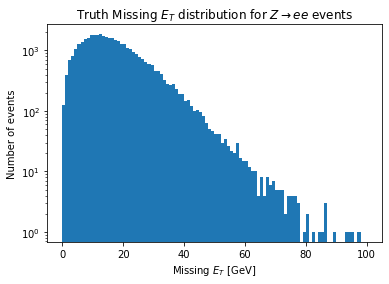

In [4]:
plt.hist(events.met, bins=100, range=(0, 100))
plt.xlabel('Missing $E_T$ [GeV]')
plt.ylabel('Number of events')
plt.yscale('log')
_ = plt.title('Truth Missing $E_T$ distribution for $Z\\rightarrow ee$ events')

## Rebuilding MET

This is not yet supported. Please see this [github issue](https://github.com/gordonwatts/xaod_usage/issues/5) for a discussion. It basically comes down to - what is a sensible way to do this without making it too "magic".

## The Datamodel

The data model when this documentation was last built was:

In [5]:
from func_adl_servicex_xaodr21.xAOD.missinget_v1 import MissingET_v1
help(MissingET_v1)

Help on class MissingET_v1 in module func_adl_servicex_xaodr21.xAOD.missinget_v1:

class MissingET_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  clearDecorations(self) -> 'bool'
 |      A method
 |  
 |  hasNonConstStore(self) -> 'bool'
 |      A method
 |  
 |  hasStore(self) -> 'bool'
 |      A method
 |  
 |  index(self) -> 'int'
 |      A method
 |  
 |  met(self) -> 'float'
 |      A method
 |  
 |  mpx(self) -> 'float'
 |      A method
 |  
 |  mpy(self) -> 'float'
 |      A method
 |  
 |  nameHash(self) -> 'int'
 |      A method
 |  
 |  phi(self) -> 'float'
 |      A method
 |  
 |  sumet(self) -> 'float'
 |      A method
 |  
 |  usingPrivateStore(self) -> 'bool'
 |      A method
 |  
 |  usingStandaloneStore(self) -> 'bool'
 |      A method
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 | 

## Further Information

* The [`xAOD::MissingET_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODMissingET/xAODMissingET/versions/MissingET_v1.h) with all the inline documentation.
* [Slides from a tutorial](https://indico.cern.ch/event/860971/contributions/3626404/attachments/1974159/3285070/met_200122.pdf) on Missing ET
* [Recommendations for R21](https://twiki.cern.ch/twiki/bin/view/AtlasProtected/JetEtmissRecommendationsR21#MET_Recommendations) from the Jet/MissingET group's twiki page.